In [4]:
#import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

##LOAD DATA

In [10]:
#Load Data
ds1 = pd.read_csv("/content/Training Data.csv")
ds2 = pd.read_csv("/content/RBI DATA states_wise_population_Income.csv")
ds3 = pd.read_csv("/content/List of states by area.csv")

##CLEANING DATA

In [11]:
ds1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10.0,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2.0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0


In [13]:
ds1.dtypes

Id                     int64
Income                 int64
Age                    int64
Experience           float64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS      float64
CURRENT_HOUSE_YRS    float64
Risk_Flag            float64
dtype: object

In [14]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92704 entries, 0 to 92703
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 92704 non-null  int64  
 1   Income             92704 non-null  int64  
 2   Age                92704 non-null  int64  
 3   Experience         92703 non-null  float64
 4   Married/Single     92703 non-null  object 
 5   House_Ownership    92703 non-null  object 
 6   Car_Ownership      92703 non-null  object 
 7   Profession         92703 non-null  object 
 8   CITY               92703 non-null  object 
 9   STATE              92703 non-null  object 
 10  CURRENT_JOB_YRS    92703 non-null  float64
 11  CURRENT_HOUSE_YRS  92703 non-null  float64
 12  Risk_Flag          92703 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 9.2+ MB


In [28]:
ds1['STATE'].nunique()
ds1['State']= ds1['STATE'].str.replace('_',' ',regex=True)

In [38]:
ds1['State'] = ds1['State'].str.replace('[','', regex=True)
ds1['State'] = ds1['State'].str.replace(']', '', regex=True)

In [39]:
ds1['State'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra Pradesh',
       'West Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar Pradesh', 'Himachal Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu and Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar Pradesh5', 'Manipur', 'Sikkim', nan], dtype=object)

In [40]:
ds1['State'] = ds1['State'].str.replace('Uttar Pradesh5', 'Uttar Pradesh', regex=True)

In [42]:
ds1['State'].unique()
ds1['State'].nunique()

28

In [46]:
ds2.head()
ds2['States_Union Territories'].nunique()

33

In [48]:
ds3.head()
ds3['State (S) / Union Territory (UT)'].nunique()

36

In [49]:
ds2.rename(columns = {'States_Union Territories': 'State'}, inplace = True)
ds3.rename(columns = {'State (S) / Union Territory (UT)': 'State'}, inplace = True)

In [50]:
ds2.head()

,State,2020-21-GSDP,2011-census-LIT-rate,2011-census-POP,2020-21-UNEMP,2011-census-Poverty-rate
0,Andaman and Nicobar Islands,72657400000,86.63,381000,106,1.00
1,Andhra Pradesh,6703215000000,67.02,49581000,60,9.20
2,Arunachal Pradesh,188672400000,65.39,1384000,106,34.67
3,Assam,2284633500000,72.19,31206000,78,31.98
4,Bihar,3857282042000,61.80,104099000,96,33.74


In [51]:
ds4 = pd.merge(ds2,ds3,how = 'left')

In [52]:
ds4.head()

,State,2020-21-GSDP,2011-census-LIT-rate,2011-census-POP,2020-21-UNEMP,2011-census-Poverty-rate,Rank,Area (km2),Region,National share (%)
0,Andaman and Nicobar Islands,72657400000,86.63,381000,106,1.00,29 (UT3),"8,249",Bay of Bengal,0.251
1,Andhra Pradesh,6703215000000,67.02,49581000,60,9.20,7 (S7),"1,62,975",Southern,4.960
2,Arunachal Pradesh,188672400000,65.39,1384000,106,34.67,14 (S14),"83,743",Northeastern,2.550
3,Assam,2284633500000,72.19,31206000,78,31.98,16 (S16),"78,438",Northeastern,2.390
4,Bihar,3857282042000,61.80,104099000,96,33.74,12 (S12),"94,163",Eastern,2.860


In [53]:
ds4.drop(['Rank','Area (km2)','National share (%)'],axis=1,inplace=True)

In [54]:
ds4['Region'].unique()

array(['Bay of Bengal', 'Southern', 'Northeastern', 'Eastern', 'Northern',
       'Central', 'Western'], dtype=object)

In [55]:
ds = pd.merge(ds1,ds4,how='left')

In [56]:
ds.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Rev_State,Re_State,R_State,State,2020-21-GSDP,2011-census-LIT-rate,2011-census-POP,2020-21-UNEMP,2011-census-Poverty-rate,Region
0,1,1303834,23,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0,Madhya Pradesh,Madhya Pradesh,Madhya Pradesh,Madhya Pradesh,5.645144e+12,75.37,72627000.0,47.0,31.65,Central
1,2,7574516,40,10.0,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0,Maharashtra,Maharashtra,Maharashtra,Maharashtra,1.889307e+13,94.00,112374000.0,65.0,17.35,Western
2,3,3991815,66,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0,Kerala,Kerala,Kerala,Kerala,5.144000e+12,66.41,33406000.0,116.0,7.05,Southern
3,4,6256451,41,2.0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0,Odisha,Odisha,Odisha,Odisha,3.814703e+12,74.43,41974000.0,78.0,32.59,Eastern
4,5,5768871,47,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0,Tamil Nadu,Tamil Nadu,Tamil Nadu,Tamil Nadu,1.245595e+13,75.84,72147000.0,58.0,11.28,Southern


In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92704 entries, 0 to 92703
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        92704 non-null  int64  
 1   Income                    92704 non-null  int64  
 2   Age                       92704 non-null  int64  
 3   Experience                92703 non-null  float64
 4   Married/Single            92703 non-null  object 
 5   House_Ownership           92703 non-null  object 
 6   Car_Ownership             92703 non-null  object 
 7   Profession                92703 non-null  object 
 8   CITY                      92703 non-null  object 
 9   STATE                     92703 non-null  object 
 10  CURRENT_JOB_YRS           92703 non-null  float64
 11  CURRENT_HOUSE_YRS         92703 non-null  float64
 12  Risk_Flag                 92703 non-null  float64
 13  Rev_State                 92703 non-null  object 
 14  Re_Sta

##CREATING CSV OF CLEANED AND MERGED DATA

In [58]:
ds.to_csv('Loan_prediction_data.csv',index=False)

In [59]:
loan_df = pd.read_csv('Loan_prediction_data.csv')

In [60]:
loan_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Rev_State,Re_State,R_State,State,2020-21-GSDP,2011-census-LIT-rate,2011-census-POP,2020-21-UNEMP,2011-census-Poverty-rate,Region
0,1,1303834,23,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0,Madhya Pradesh,Madhya Pradesh,Madhya Pradesh,Madhya Pradesh,5.645144e+12,75.37,72627000.0,47.0,31.65,Central
1,2,7574516,40,10.0,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0,Maharashtra,Maharashtra,Maharashtra,Maharashtra,1.889307e+13,94.00,112374000.0,65.0,17.35,Western
2,3,3991815,66,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0,Kerala,Kerala,Kerala,Kerala,5.144000e+12,66.41,33406000.0,116.0,7.05,Southern
3,4,6256451,41,2.0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0,Odisha,Odisha,Odisha,Odisha,3.814703e+12,74.43,41974000.0,78.0,32.59,Eastern
4,5,5768871,47,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0,Tamil Nadu,Tamil Nadu,Tamil Nadu,Tamil Nadu,1.245595e+13,75.84,72147000.0,58.0,11.28,Southern


In [64]:
loan_df.drop(['STATE'],axis=1,inplace=True)
loan_df.drop(['R_State'],axis=1,inplace=True)
loan_df.drop(['Re_State'],axis=1,inplace=True)

In [65]:
loan_df.rename({'Married/Single':'Marital_Status','2020-21-GSDP':'State_GDP','2011-census-LIT-rate':'Literacy_Rate','2011-census-POP':'Population','2020-21-UNEMP':'Unemployment','2011-census-Poverty-rate':'Poverty_Rate'},axis=1,inplace=True)

In [66]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92704 entries, 0 to 92703
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 92704 non-null  int64  
 1   Income             92704 non-null  int64  
 2   Age                92704 non-null  int64  
 3   Experience         92703 non-null  float64
 4   Marital_Status     92703 non-null  object 
 5   House_Ownership    92703 non-null  object 
 6   Car_Ownership      92703 non-null  object 
 7   Profession         92703 non-null  object 
 8   CITY               92703 non-null  object 
 9   CURRENT_JOB_YRS    92703 non-null  float64
 10  CURRENT_HOUSE_YRS  92703 non-null  float64
 11  Risk_Flag          92703 non-null  float64
 12  Rev_State          92703 non-null  object 
 13  State              92703 non-null  object 
 14  State_GDP          92703 non-null  float64
 15  Literacy_Rate      92703 non-null  float64
 16  Population         927

##Exploratory Data Analysis & Feature Engineering

In [67]:
loan_df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,State_GDP,Literacy_Rate,Population,Unemployment,Poverty_Rate
count,92704.000000,9.270400e+04,92704.000000,92703.000000,92703.000000,92703.000000,92703.000000,9.270300e+04,92703.000000,9.270300e+04,92703.000000,92703.000000
mean,46352.500000,5.003292e+06,49.994369,10.112618,6.342211,11.996516,0.137870,8.304888e+12,75.698967,8.002677e+07,68.701833,20.660758
std,26761.484015,2.876086e+06,17.054120,5.995696,3.644468,1.396976,0.344766,4.836554e+12,9.507251,5.226832e+07,20.416139,9.516352
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,1.441739e+11,61.800000,6.110000e+05,30.000000,7.050000
25%,23176.750000,2.509059e+06,35.000000,5.000000,4.000000,11.000000,0.000000,5.144000e+12,67.160000,4.197400e+07,47.000000,11.280000
50%,46352.500000,5.010356e+06,50.000000,10.000000,6.000000,12.000000,0.000000,6.703215e+12,75.370000,7.214700e+07,65.000000,17.350000
75%,69528.250000,7.477764e+06,65.000000,15.000000,9.000000,13.000000,0.000000,1.143873e+13,80.090000,1.040990e+08,80.000000,29.430000
max,92704.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.889307e+13,94.000000,1.998120e+08,133.000000,39.930000


In [68]:
loan_df['Per_Capita_Income'] = loan_df['State_GDP']/loan_df['Population']

In [69]:
pd.qcut(loan_df['Income'],q=3).value_counts()

(10309.999, 3331423.0]    30912
(6649334.0, 9999180.0]    30898
(3331423.0, 6649334.0]    30894
Name: Income, dtype: int64

In [70]:
bin_labels = ['Low','Medium','High']
loan_df['Income_Category'] = pd.qcut(loan_df['Income'],q=3,labels=bin_labels)

In [71]:
loan_df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Rev_State,State,State_GDP,Literacy_Rate,Population,Unemployment,Poverty_Rate,Region,Per_Capita_Income,Income_Category
0,1,1303834,23,3.0,single,rented,no,Mechanical_engineer,Rewa,3.0,13.0,0.0,Madhya Pradesh,Madhya Pradesh,5.645144e+12,75.37,72627000.0,47.0,31.65,Central,77727.893208,Low
1,2,7574516,40,10.0,single,rented,no,Software_Developer,Parbhani,9.0,13.0,0.0,Maharashtra,Maharashtra,1.889307e+13,94.00,112374000.0,65.0,17.35,Western,168126.671650,High
2,3,3991815,66,4.0,married,rented,no,Technical_writer,Alappuzha,4.0,10.0,0.0,Kerala,Kerala,5.144000e+12,66.41,33406000.0,116.0,7.05,Southern,153984.311202,Medium
3,4,6256451,41,2.0,single,rented,yes,Software_Developer,Bhubaneswar,2.0,12.0,1.0,Odisha,Odisha,3.814703e+12,74.43,41974000.0,78.0,32.59,Eastern,90882.529661,Medium
4,5,5768871,47,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],3.0,14.0,1.0,Tamil Nadu,Tamil Nadu,1.245595e+13,75.84,72147000.0,58.0,11.28,Southern,172646.839092,Medium


In [72]:
pd.qcut(loan_df['Age'],q=3).value_counts()

(40.0, 60.0]      31695
(20.999, 40.0]    31205
(60.0, 79.0]      29804
Name: Age, dtype: int64

In [73]:
bin_labels1 = ['Young','Middle-Age','Senior']
loan_df['Age_Group'] = pd.qcut(loan_df['Age'],q=3,labels=bin_labels1)

In [74]:
pd.qcut(loan_df['CURRENT_JOB_YRS'],q=3).value_counts()

(-0.001, 4.0]    33655
(4.0, 8.0]       32041
(8.0, 14.0]      27007
Name: CURRENT_JOB_YRS, dtype: int64

In [75]:
bin_labels2 = ['0-4','5-8','9-14']
loan_df['Job_yrs'] = pd.qcut(loan_df['CURRENT_JOB_YRS'],q=3,labels=bin_labels2)

In [76]:
pd.qcut(loan_df['CURRENT_HOUSE_YRS'],q=2).value_counts()

(9.999, 12.0]    56134
(12.0, 14.0]     36569
Name: CURRENT_HOUSE_YRS, dtype: int64

In [77]:
loan_df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Rev_State,State,State_GDP,Literacy_Rate,Population,Unemployment,Poverty_Rate,Region,Per_Capita_Income,Income_Category,Age_Group,Job_yrs
0,1,1303834,23,3.0,single,rented,no,Mechanical_engineer,Rewa,3.0,13.0,0.0,Madhya Pradesh,Madhya Pradesh,5.645144e+12,75.37,72627000.0,47.0,31.65,Central,77727.893208,Low,Young,0-4
1,2,7574516,40,10.0,single,rented,no,Software_Developer,Parbhani,9.0,13.0,0.0,Maharashtra,Maharashtra,1.889307e+13,94.00,112374000.0,65.0,17.35,Western,168126.671650,High,Young,9-14
2,3,3991815,66,4.0,married,rented,no,Technical_writer,Alappuzha,4.0,10.0,0.0,Kerala,Kerala,5.144000e+12,66.41,33406000.0,116.0,7.05,Southern,153984.311202,Medium,Senior,0-4
3,4,6256451,41,2.0,single,rented,yes,Software_Developer,Bhubaneswar,2.0,12.0,1.0,Odisha,Odisha,3.814703e+12,74.43,41974000.0,78.0,32.59,Eastern,90882.529661,Medium,Middle-Age,0-4
4,5,5768871,47,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],3.0,14.0,1.0,Tamil Nadu,Tamil Nadu,1.245595e+13,75.84,72147000.0,58.0,11.28,Southern,172646.839092,Medium,Middle-Age,0-4


In [79]:
loan_df.to_csv('Loan_prediction_data.csv', index = False)

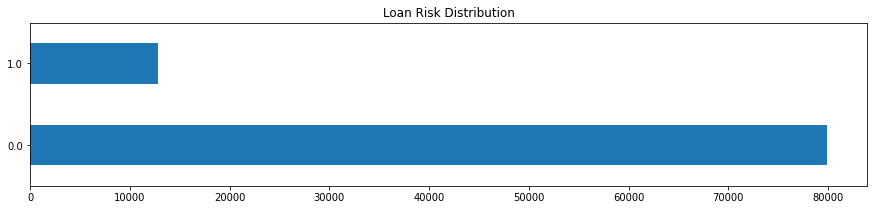

In [80]:
loan_df["Risk_Flag"].value_counts().plot(kind='barh',title='Loan Risk Distribution', 
                                 figsize=(15,3))

In [81]:
loan_df["Risk_Flag"].value_counts()

0.0    79922
1.0    12781
Name: Risk_Flag, dtype: int64

**Risk flag of no_default(0) is very low compared to is_default(1)**



In [84]:
loan_df.groupby("Age_Group").agg({"Age":[min,max]})

Age    
           min max
Age_Group         
Young       21  40
Middle-Age  41  60
Senior      61  79

In [86]:
loan_df.groupby("Income_Category").agg({"Income":[min,max]})

Income         
                     min      max
Income_Category                  
Low                10310  3331423
Medium           3331559  6649334
High             6650638  9999180

In [87]:
loan_df.groupby('Job_yrs').agg({"CURRENT_JOB_YRS":[min,max]})

CURRENT_JOB_YRS      
                    min   max
Job_yrs                      
0-4                 0.0   4.0
5-8                 5.0   8.0
9-14                9.0  14.0

In [90]:
loan_df.groupby(['Risk_Flag','Income_Category','Age_Group']).agg({'Risk_Flag':'count'})

Risk_Flag
Risk_Flag Income_Category Age_Group            
0.0       Low             Young            8961
                          Middle-Age       8911
                          Senior           8781
          Medium          Young            8976
                          Middle-Age       9278
                          Senior           8524
          High            Young            8709
                          Middle-Age       9170
                          Senior           8612
1.0       Low             Young            1610
                          Middle-Age       1428
                          Senior           1221
          Medium          Young            1364
                          Middle-Age       1516
                          Senior           1236
          High            Young            1585
                          Middle-Age       1391
                          Senior           1430

##Income wise share of Risk

In [98]:
df2 = loan_df.groupby(['Income_Category','Risk_Flag']).agg({'Risk_Flag':'count'})
df3 = df2.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df3))

                           Risk_Flag
Income_Category Risk_Flag           
Low             0.0             86.0
                1.0             14.0
Medium          0.0             87.0
                1.0             13.0
High            0.0             86.0
                1.0             14.0


Analyzing w.r.t variables will not serve purpose as dataset is highly imbalanced towards Risk Flag 0 : non-defaulters

##Distribution of risk(%) by income cat.

In [100]:
df2 = loan_df.groupby(['Risk_Flag','Income_Category']).agg({'Risk_Flag':'count'})
df3 = df2.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df3))

                           Risk_Flag
Risk_Flag Income_Category           
0.0       Low                   33.0
          Medium                34.0
          High                  33.0
1.0       Low                   33.0
          Medium                32.0
          High                  34.0


It seems loan default % is slightly higher in low and high income group

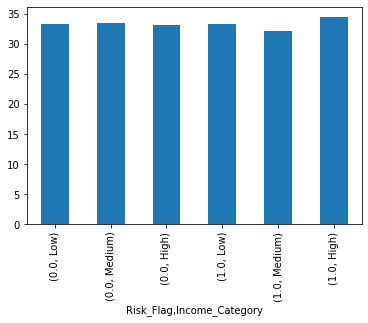

In [101]:
df3['Risk_Flag'].plot(kind='bar')

##Distribution of risk flag (%) by Age group

In [102]:
df4 = loan_df.groupby(['Risk_Flag','Age_Group']).agg({'Risk_Flag':'count'})
df5 = df4.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df5))

                      Risk_Flag
Risk_Flag Age_Group            
0.0       Young            33.0
          Middle-Age       34.0
          Senior           32.0
1.0       Young            36.0
          Middle-Age       34.0
          Senior           30.0


It is observed that loan default % is slightly high in young people (36%) followed by Middle-Age(33%) and Senior (30%)

##Distribution of risk flag (%) by Region

In [103]:
df6 = loan_df.groupby(['Risk_Flag','Region']).agg({'Risk_Flag':'count'})
df7 = df6.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df7))

                        Risk_Flag
Risk_Flag Region                 
0.0       Central             7.0
          Eastern            22.0
          Northeastern        4.0
          Northern           24.0
          Southern           28.0
          Western            15.0
1.0       Central             9.0
          Eastern            25.0
          Northeastern        5.0
          Northern           24.0
          Southern           24.0
          Western            14.0


In [104]:
loan_df.groupby(['Region']).mean()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,State_GDP,Literacy_Rate,Population,Unemployment,Poverty_Rate,Per_Capita_Income
Region,,,,,,,,,,,,,
Central,46451.322747,4.923515e+06,49.337487,10.524692,6.496733,12.039660,0.177025,4.966875e+12,74.287959,6.261823e+07,50.401307,33.410176,81630.488044
Eastern,46378.403604,5.103819e+06,50.026173,10.194508,6.355978,11.987986,0.151936,5.268525e+12,68.576888,8.251007e+07,72.615465,28.480669,66599.299435
Northeastern,46505.808205,4.938312e+06,50.156367,9.693127,6.165956,11.938466,0.160096,1.671021e+12,76.139164,2.253896e+07,71.927011,28.784227,92740.085471
Northern,46244.569314,4.884151e+06,50.290729,10.281200,6.383132,12.095063,0.133265,7.685647e+12,79.854864,1.125963e+08,82.531865,20.068432,120980.239399
Southern,46358.696912,5.047490e+06,49.731410,9.850880,6.233774,11.941258,0.122332,8.588554e+12,69.591007,5.310158e+07,62.569651,12.046263,160592.076077
Western,46386.439453,5.020267e+06,50.212190,10.107266,6.427160,11.943806,0.127533,1.689471e+13,91.571859,9.618619e+07,59.077705,17.125576,180092.945226


It is observed that loan default % is high in Eastern (25%)and Southern (24%) region. However, it is noteworthy that avg. per-capita income of Eastern region is lowest & Southern region is second highest.

##Marital Status wise share (%) in Risk Flag

In [105]:
df8 = loan_df.groupby(['Risk_Flag','Marital_Status']).agg({'Risk_Flag':'count'})
df9 = df8.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df9))

                          Risk_Flag
Risk_Flag Marital_Status           
0.0       married              10.0
          single               90.0
1.0       married               9.0
          single               91.0


Share of single people defaulting on loan is 91% than married persons (9%). Very skewed data.

##House Ownership wise share (%) in Risk Flag

In [106]:
df10 = loan_df.groupby(['Risk_Flag','House_Ownership']).agg({'Risk_Flag':'count'})
df11 = df10.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df11))

                           Risk_Flag
Risk_Flag House_Ownership           
0.0       norent_noown           3.0
          owned                  5.0
          rented                92.0
1.0       norent_noown           2.0
          owned                  4.0
          rented                94.0


Share of people in rented house defaulting on loan is 94% than others. Very skewed data.

##Car Ownership wise share (%) in Risk Flag

In [107]:
df12 = loan_df.groupby(['Risk_Flag','Car_Ownership']).agg({'Risk_Flag':'count'})
df13 = df12.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df13))

                         Risk_Flag
Risk_Flag Car_Ownership           
0.0       no                  68.0
          yes                 32.0
1.0       no                  77.0
          yes                 23.0


Share of people defaulting on loan who do not have car is 73% than who has. Skewed data.

##Job years wise share (%) in Risk Flag

In [109]:
df16 = loan_df.groupby(['Risk_Flag','Job_yrs']).agg({'Risk_Flag':'count'})
df17 = df16.groupby(level=0).apply(lambda x : 100 * x / float(x.sum()))
print(round(df17))

                   Risk_Flag
Risk_Flag Job_yrs           
0.0       0-4           36.0
          5-8           35.0
          9-14          29.0
1.0       0-4           36.0
          5-8           34.0
          9-14          30.0


Job_Yrs is showing almost similar share in risk distribution as income category

##Visualizing patterns

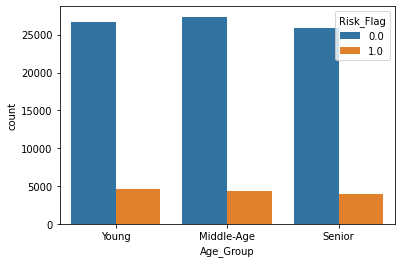

In [110]:
#wrt age group
sns.countplot(data=loan_df,x='Age_Group',hue='Risk_Flag')

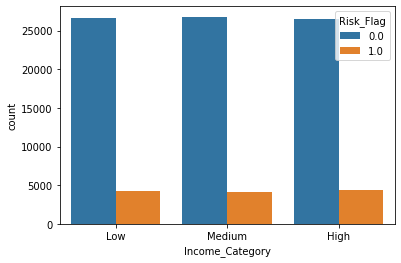

In [111]:
#wrt income
sns.countplot(data=loan_df,x='Income_Category',hue='Risk_Flag')

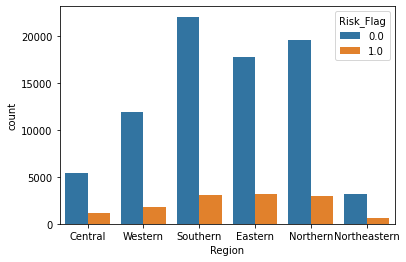

In [113]:
#wrt region
sns.countplot(data=loan_df,x='Region',hue='Risk_Flag')

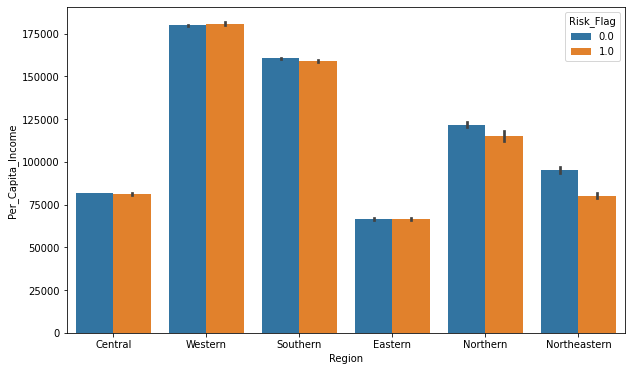

In [114]:
plt.figure(figsize= (10,6))
sns.barplot(x='Region',y='Per_Capita_Income',hue='Risk_Flag',data=loan_df)

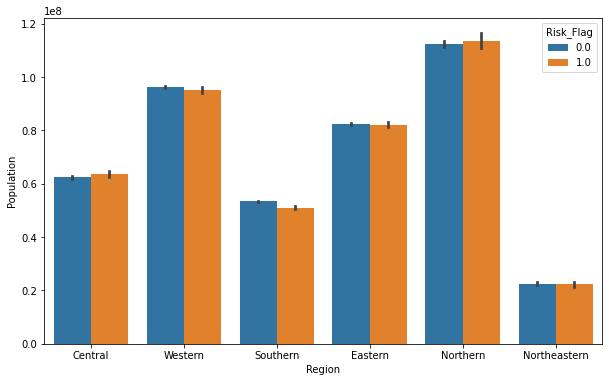

In [115]:
plt.figure(figsize= (10,6))
sns.barplot(x='Region',y='Population',hue='Risk_Flag',data=loan_df)

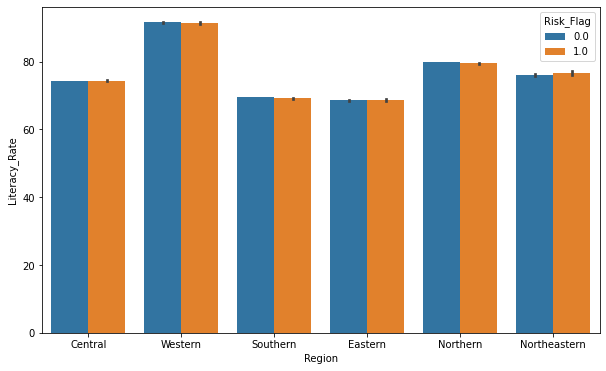

In [116]:
plt.figure(figsize= (10,6))
sns.barplot(x='Region',y='Literacy_Rate',hue='Risk_Flag',data=loan_df)

In [117]:
loan_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Marital_Status',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Rev_State',
       'State', 'State_GDP', 'Literacy_Rate', 'Population', 'Unemployment',
       'Poverty_Rate', 'Region', 'Per_Capita_Income', 'Income_Category',
       'Age_Group', 'Job_yrs'],
      dtype='object')

##Combining similar professions

In [118]:
loan_df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist',
       nan], dtype=object)

In [119]:
Profession_type = {'Mechanical_engineer':'Professional', 'Software_Developer':'Service', 'Technical_writer':'Service',
       'Civil_servant':'Government', 'Librarian':'Service', 'Economist':'Service', 'Flight_attendant':'Service',
       'Architect':'Professional', 'Designer':'Service', 'Physician':'Professional', 'Financial_Analyst':'Service',
       'Air_traffic_controller':'Government', 'Politician':'Government', 'Police_officer':'Government', 'Artist':'Service',
       'Surveyor':'Service', 'Design_Engineer':'Professional', 'Chemical_engineer':'Professional',
       'Hotel_Manager':'Service', 'Dentist':'Professional', 'Comedian':'Service', 'Biomedical_Engineer':'Professional',
       'Graphic_Designer':'Service', 'Computer_hardware_engineer':'Service',
       'Petroleum_Engineer':'Professional', 'Secretary':'Service', 'Computer_operator':'Service',
       'Chartered_Accountant':'Professional', 'Technician':'Service', 'Microbiologist':'Professional',
       'Fashion_Designer':'Service', 'Aviator':'Professional', 'Psychologist':'Professional', 'Magistrate':'Professional',
       'Lawyer':'Professional', 'Firefighter':'Government', 'Engineer':'Professional', 'Official':'Service', 'Analyst':'Service',
       'Geologist':'Professional', 'Drafter':'Service', 'Statistician':'Professional', 'Web_designer':'Service',
       'Consultant':'Professional', 'Chef':'Service', 'Army_officer':'Government', 'Surgeon':'Professional', 'Scientist':'Professional',
       'Civil_engineer':'Professional', 'Industrial_Engineer':'Professional', 'Technology_specialist':'Service'}

In [120]:
loan_df['Profession_Cat'] = loan_df['Profession'].map(Profession_type)

In [121]:
loan_df['Profession_Cat'].unique()

array(['Professional', 'Service', 'Government', nan], dtype=object)

##Feature selection and finding COrrelation

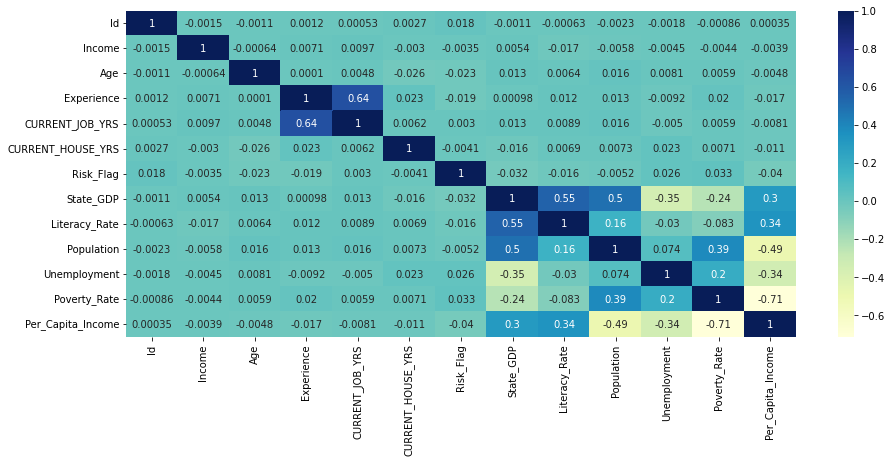

In [122]:
plt.figure(figsize= (15,6))
dataplot = sns.heatmap(loan_df.corr(), cmap="YlGnBu", annot=True)

Experience & Current Job years are highly correlated with each other. Similarly, literacy rate, poverty rate & unemployment has high correlation with per_capita income.

##Variance Inflation Factor (VIF) on features

In [123]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(loan_df[['Region','Profession_Cat']]).toarray())

In [124]:
ohe.categories_

[array(['Central', 'Eastern', 'Northeastern', 'Northern', 'Southern',
        'Western', nan], dtype=object),
 array(['Government', 'Professional', 'Service', nan], dtype=object)]

In [125]:
le = LabelEncoder()

##Create a dictionary to map categories to weightage

In [126]:
house_weightage = {'norent_noown': 0, 'rented': 1, 'owned': 2}
age_weightage = {'Young': 0, 'Middle-Age': 1, 'Senior': 2}
income_weightage = {'Low': 0, 'Medium': 1, 'High': 2}
jobyr_weightage = {'0-4': 0, '5-8': 1, '9-14': 2}

In [127]:
loan_df['Marital_Status1'] = le.fit_transform(loan_df.Marital_Status)
loan_df['Car_Ownership1'] = le.fit_transform(loan_df.Car_Ownership)
#loan_df['House_Ownership1'] = le.fit_transform(loan_df.House_Ownership)
loan_df['House_Ownership1'] =loan_df['House_Ownership'].map(house_weightage)
#loan_df['Age_Group1'] = le.fit_transform(loan_df.Age_Group)
loan_df['Age_Group1'] = loan_df['Age_Group'].map(age_weightage)
#loan_df['Income_Category1'] = le.fit_transform(loan_df.Income_Category)
loan_df['Income_Category1'] = loan_df['Income_Category'].map(income_weightage)
#loan_df['Job_yrs1'] = le.fit_transform(loan_df.Job_yrs).map(jobyr_weightage)
loan_df['Job_yrs1'] = loan_df['Job_yrs'].map(jobyr_weightage)

##Combining orignal df with one_hot_encoding df

In [128]:
final_loan_df = loan_df.join(ohe_df)

In [129]:
final_loan_df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Rev_State,State,State_GDP,Literacy_Rate,Population,Unemployment,Poverty_Rate,Region,Per_Capita_Income,Income_Category,Age_Group,Job_yrs,Profession_Cat,Marital_Status1,Car_Ownership1,House_Ownership1,Age_Group1,Income_Category1,Job_yrs1,0,1,2,3,4,5,6,7,8,9,10
0,1,1303834,23,3.0,single,rented,no,Mechanical_engineer,Rewa,3.0,13.0,0.0,Madhya Pradesh,Madhya Pradesh,5.645144e+12,75.37,72627000.0,47.0,31.65,Central,77727.893208,Low,Young,0-4,Professional,1,0,1.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,7574516,40,10.0,single,rented,no,Software_Developer,Parbhani,9.0,13.0,0.0,Maharashtra,Maharashtra,1.889307e+13,94.00,112374000.0,65.0,17.35,Western,168126.671650,High,Young,9-14,Service,1,0,1.0,0,2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,3991815,66,4.0,married,rented,no,Technical_writer,Alappuzha,4.0,10.0,0.0,Kerala,Kerala,5.144000e+12,66.41,33406000.0,116.0,7.05,Southern,153984.311202,Medium,Senior,0-4,Service,0,0,1.0,2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,6256451,41,2.0,single,rented,yes,Software_Developer,Bhubaneswar,2.0,12.0,1.0,Odisha,Odisha,3.814703e+12,74.43,41974000.0,78.0,32.59,Eastern,90882.529661,Medium,Middle-Age,0-4,Service,1,1,1.0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,5768871,47,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],3.0,14.0,1.0,Tamil Nadu,Tamil Nadu,1.245595e+13,75.84,72147000.0,58.0,11.28,Southern,172646.839092,Medium,Middle-Age,0-4,Government,1,0,1.0,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [131]:
final_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92704 entries, 0 to 92703
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Id                 92704 non-null  int64   
 1   Income             92704 non-null  int64   
 2   Age                92704 non-null  int64   
 3   Experience         92703 non-null  float64 
 4   Marital_Status     92703 non-null  object  
 5   House_Ownership    92703 non-null  object  
 6   Car_Ownership      92703 non-null  object  
 7   Profession         92703 non-null  object  
 8   CITY               92703 non-null  object  
 9   CURRENT_JOB_YRS    92703 non-null  float64 
 10  CURRENT_HOUSE_YRS  92703 non-null  float64 
 11  Risk_Flag          92703 non-null  float64 
 12  Rev_State          92703 non-null  object  
 13  State              92703 non-null  object  
 14  State_GDP          92703 non-null  float64 
 15  Literacy_Rate      92703 non-null  float64 
 16  Popu

In [132]:
loan_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Marital_Status',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Rev_State',
       'State', 'State_GDP', 'Literacy_Rate', 'Population', 'Unemployment',
       'Poverty_Rate', 'Region', 'Per_Capita_Income', 'Income_Category',
       'Age_Group', 'Job_yrs', 'Profession_Cat', 'Marital_Status1',
       'Car_Ownership1', 'House_Ownership1', 'Age_Group1', 'Income_Category1',
       'Job_yrs1'],
      dtype='object')

In [134]:
final_loan_df.drop(['Id','Marital_Status','House_Ownership','Car_Ownership','Profession', 'CITY','Rev_State','State','Region','Income_Category','Age_Group', 'Job_yrs', 'Profession_Cat'],axis=1,inplace=True)



Index([           'Income',               'Age',        'Experience',
         'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',         'Risk_Flag',
               'State_GDP',     'Literacy_Rate',        'Population',
            'Unemployment',      'Poverty_Rate', 'Per_Capita_Income',
         'Marital_Status1',    'Car_Ownership1',  'House_Ownership1',
              'Age_Group1',  'Income_Category1',          'Job_yrs1',
                         0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,                  10],
      dtype='object')

In [135]:
X_var = final_loan_df[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','State_GDP', 'Literacy_Rate', 'Population', 'Unemployment','Poverty_Rate','Per_Capita_Income','Marital_Status1','Income_Category1','House_Ownership1','Car_Ownership1','Age_Group1','Job_yrs1']]

In [143]:
X_var.dropna(axis=0,inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [144]:
X_var

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,State_GDP,Literacy_Rate,Population,Unemployment,Poverty_Rate,Per_Capita_Income,Marital_Status1,Income_Category1,House_Ownership1,Car_Ownership1,Age_Group1,Job_yrs1
0,1303834,23,3.0,3.0,13.0,5.645144e+12,75.37,72627000.0,47.0,31.65,77727.893208,1,0,1.0,0,0,0
1,7574516,40,10.0,9.0,13.0,1.889307e+13,94.00,112374000.0,65.0,17.35,168126.671650,1,2,1.0,0,0,2
2,3991815,66,4.0,4.0,10.0,5.144000e+12,66.41,33406000.0,116.0,7.05,153984.311202,0,1,1.0,0,2,0
3,6256451,41,2.0,2.0,12.0,3.814703e+12,74.43,41974000.0,78.0,32.59,90882.529661,1,1,1.0,1,1,0
4,5768871,47,11.0,3.0,14.0,1.245595e+13,75.84,72147000.0,58.0,11.28,172646.839092,1,1,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92698,2491348,47,11.0,11.0,10.0,6.099273e+12,66.54,35000000.0,77.0,13.74,174264.951429,1,0,1.0,0,1,2
92699,6258257,41,8.0,7.0,14.0,1.245595e+13,75.84,72147000.0,58.0,11.28,172646.839092,1,1,1.0,1,1,1
92700,726110,68,18.0,10.0,13.0,2.189621e+12,82.80,32988000.0,93.0,36.96,66376.291379,1,0,0.0,1,2,2
92701,2741381,35,17.0,3.0,14.0,6.099273e+12,66.54,35000000.0,77.0,13.74,174264.951429,1,0,1.0,0,0,0


In [145]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_var.columns
vif_data["VIF"] = [variance_inflation_factor(X_var.values, i) for i in range(len(X_var.columns))]
print(vif_data)

              feature        VIF
0              Income   8.729547
1                 Age   7.892045
2          Experience   1.730921
3     CURRENT_JOB_YRS   8.326218
4   CURRENT_HOUSE_YRS   0.686331
5           State_GDP  15.174598
6       Literacy_Rate   1.604299
7          Population   3.468542
8        Unemployment   1.383599
9        Poverty_Rate   2.299130
10  Per_Capita_Income   3.749164
11    Marital_Status1   0.968089
12   Income_Category1   8.801641
13   House_Ownership1   0.956921
14     Car_Ownership1   1.000245
15         Age_Group1   8.183625
16           Job_yrs1   7.117594


*   From the correlation heatmap, it is evident that Experience & Current Job Year are highly correlated so we can drop one variable which has low correlation with the Target Variable | Dropping Current Job Yr
*  Income & Age were binned into income_cat & Age_group | Dropping one set 
*   We will try removing the variables one at a time and check the VIF to check if need to drop further variable







In [153]:
X_var.dropna(axis =0 , inplace = True)
final_loan_df.dropna(axis =0 , inplace = True)

In [154]:
X_var = final_loan_df[['Experience','CURRENT_HOUSE_YRS','State_GDP', 'Literacy_Rate', 'Population', 'Unemployment','Poverty_Rate','Per_Capita_Income','Marital_Status1','Income_Category1','House_Ownership1','Car_Ownership1','Age_Group1','Job_yrs1']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_var.columns
vif_data["VIF"] = [variance_inflation_factor(X_var.values, i) for i in range(len(X_var.columns))]
print(vif_data)

              feature        VIF
0          Experience   1.444109
1   CURRENT_HOUSE_YRS   0.637462
2           State_GDP  15.104816
3       Literacy_Rate   1.562736
4          Population   3.453449
5        Unemployment   1.371340
6        Poverty_Rate   2.283852
7   Per_Capita_Income   3.700571
8     Marital_Status1   0.963062
9    Income_Category1   0.991471
10   House_Ownership1   0.943710
11     Car_Ownership1   0.999210
12         Age_Group1   0.992685
13           Job_yrs1   1.447804


In [155]:
X = final_loan_df.drop(['Risk_Flag'],axis=1)
y = final_loan_df.Risk_Flag

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Fitting of Baseline Model : Logistics Regression

In [157]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     16030
         1.0       0.00      0.00      0.00      2511

    accuracy                           0.86     18541
   macro avg       0.43      0.50      0.46     18541
weighted avg       0.75      0.86      0.80     18541



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Fitting of Baseline Model : Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
y_pred_dtc = model1.predict_proba(X_test)
y_train_dtc = model1.predict_proba(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [160]:
model1.predict_proba(X_test[:5])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [161]:
model1.predict(X_test[:5])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0., 0., 0., 1., 0.])

In [162]:
import sklearn.metrics as metrics
results_train=[]
for i in range(0,101):
    y_pred = y_pred_dtc[:,1]
    y_hat = [1 if pred >= i/100 else 0 for pred in y_pred]
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()
    recall = metrics.recall_score(y_test, y_hat)
    precision = metrics.precision_score(y_test, y_hat)
    accuracy = metrics.accuracy_score(y_test, y_hat)
    f1 = metrics.f1_score(y_test, y_hat)
    f1_beta_10 = metrics.fbeta_score(y_test, y_hat, beta=10)
    auc = metrics.roc_auc_score(y_test, y_pred)
    au_prc = metrics.average_precision_score(y_test, y_pred)
    results_train.append([i/100, tp, fp, fn, tn, precision, recall, f1, f1_beta_10, auc, au_prc])

    
print('\nSaved Diagnostincs: ')
results__train_df = pd.DataFrame(results_train,columns = ['level', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall', 'f1', 'f1_beta_10', 'auc', 'au_prc'])
display(results__train_df)


Saved Diagnostincs: 


,level,tp,fp,fn,tn,precision,recall,f1,f1_beta_10,auc,au_prc
0,0.00,2511,16030,0,0,0.135430,1.000000,0.238552,0.940551,0.974592,0.773201
1,0.01,2511,1090,0,14940,0.697306,1.000000,0.821662,0.995720,0.974592,0.773201
2,0.02,2511,1090,0,14940,0.697306,1.000000,0.821662,0.995720,0.974592,0.773201
3,0.03,2511,1090,0,14940,0.697306,1.000000,0.821662,0.995720,0.974592,0.773201
4,0.04,2511,1090,0,14940,0.697306,1.000000,0.821662,0.995720,0.974592,0.773201
...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,229,52,2282,15978,0.814947,0.091199,0.164040,0.092008,0.974592,0.773201
97,0.97,229,52,2282,15978,0.814947,0.091199,0.164040,0.092008,0.974592,0.773201
98,0.98,229,52,2282,15978,0.814947,0.091199,0.164040,0.092008,0.974592,0.773201
99,0.99,229,52,2282,15978,0.814947,0.091199,0.164040,0.092008,0.974592,0.773201


In [163]:
import sklearn.metrics as metrics
results_train1=[]
for i in range(0,101):
    y_pred = y_train_dtc[:,1]
    y_hat = [1 if pred >= i/100 else 0 for pred in y_pred]
    tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_hat).ravel()
    recall = metrics.recall_score(y_train, y_hat)
    precision = metrics.precision_score(y_train, y_hat)
    accuracy = metrics.accuracy_score(y_train, y_hat)
    f1 = metrics.f1_score(y_train, y_hat)
    f1_beta_10 = metrics.fbeta_score(y_train, y_hat, beta=10)
    auc = metrics.roc_auc_score(y_train, y_pred)
    au_prc = metrics.average_precision_score(y_train, y_pred)
    results_train1.append([i/100, tp, fp, fn, tn, precision, recall, f1, f1_beta_10, auc, au_prc])

    
print('\nSaved Diagnostincs: ')
results__train1_df = pd.DataFrame(results_train1,columns = ['level', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall', 'f1', 'f1_beta_10', 'auc', 'au_prc'])
display(results__train1_df)


Saved Diagnostincs: 


,level,tp,fp,fn,tn,precision,recall,f1,f1_beta_10,auc,au_prc
0,0.00,10270,63892,0,0,0.138481,1.000000,0.243273,0.941978,0.983572,0.879679
1,0.01,10270,4383,0,59509,0.700880,1.000000,0.824138,0.995792,0.983572,0.879679
2,0.02,10270,4383,0,59509,0.700880,1.000000,0.824138,0.995792,0.983572,0.879679
3,0.03,10270,4383,0,59509,0.700880,1.000000,0.824138,0.995792,0.983572,0.879679
4,0.04,10270,4383,0,59509,0.700880,1.000000,0.824138,0.995792,0.983572,0.879679
...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,1118,0,9152,63892,1.000000,0.108861,0.196347,0.109830,0.983572,0.879679
97,0.97,1118,0,9152,63892,1.000000,0.108861,0.196347,0.109830,0.983572,0.879679
98,0.98,1118,0,9152,63892,1.000000,0.108861,0.196347,0.109830,0.983572,0.879679
99,0.99,1118,0,9152,63892,1.000000,0.108861,0.196347,0.109830,0.983572,0.879679


In [164]:
results__train_df.to_csv('Loan_prediction_Results.csv', index = False)

In [165]:
results__train1_df.to_csv('Loan_prediction_Results1.csv', index = False)

##Fitting of Baseline Model : Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators= 10, criterion="entropy")
model2.fit(X_train, y_train)
y_pred_rfc = model2.predict_proba(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [167]:
X = final_loan_df.drop(['Risk_Flag','Age_Group1', 'Income_Category1', 'Job_yrs1'],axis=1)
y = final_loan_df.Risk_Flag

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [169]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate = 0.1,alpha = 10, n_estimators = 1000)
xgb.fit(X_train, y_train)
y1_pred = xgb.predict(X_test)

In [170]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94     16030
         1.0       0.82      0.15      0.26      2511

    accuracy                           0.88     18541
   macro avg       0.85      0.57      0.60     18541
weighted avg       0.87      0.88      0.84     18541

